<a href="https://colab.research.google.com/github/GuangyuNie/MAE_598_Optimization/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P1:

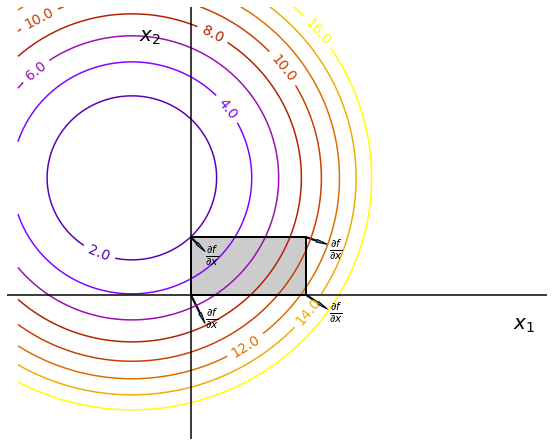

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T


plt.figure(1, figsize=(7.5, 6))
plt.clf()
plt.axes([0, 0, 1, 1])

contours = plt.contour((x + 1)**2 + (y - 2)**2,[0,2,4,6,8,10,12,14,16],
                    extent=[-3, 6, -2.5, 5],
                    cmap=plt.cm.gnuplot)
plt.clabel(contours,
        inline=1,
        fmt='%1.1f',
        fontsize=14)
plt.plot([0, 0, 2 ,  2,0],
        [0,  1, 1, 0,0], 'k', linewidth=2)
plt.fill_between([ 0,  2],
                [ 0, 0],
                [  1,  1],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 4.4, '$x_2$', size=20)
plt.text(5.6, -.6, '$x_1$', size=20)
plt.axis('equal')
plt.axis('off')


plt.arrow(0, 0, 0.25, -0.5, width=0.02, head_width=0.05, head_length=0.2, length_includes_head=True)
plt.text(0.25, -0.5, r'$\frac{\partial f}{\partial x}$', fontsize=15)

plt.arrow(0, 1, 0.25, -0.25, width=0.02, head_width=0.05, head_length=0.2, length_includes_head=True)
plt.text(0.25, 0.6, r'$\frac{\partial f}{\partial x}$', fontsize=15)

plt.arrow(2, 0, 0.375, -0.25, width=0.02, head_width=0.05, head_length=0.2, length_includes_head=True)
plt.text(2.4, -0.4, r'$\frac{\partial f}{\partial x}$', fontsize=15)


plt.arrow(2, 1, 0.375, -0.125, width=0.02, head_width=0.05, head_length=0.2, length_includes_head=True)
plt.text(2.4, 0.7, r'$\frac{\partial f}{\partial x}$', fontsize=15)

plt.show()






KKT:

\begin{equation}
\begin{aligned}
\min_{x_1, x_2} L = (x_1 + 1) ^ 2 + (x_2 - 2) ^ 2 + \mu_1(x_1-2)+ \mu_2(-x_1)+ \mu_3(x_2-1)+ \mu_4(-x_2)
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{\partial L}{\partial x} = \begin{bmatrix} 2(x_1 + 1) + \mu_1 - \mu_2\\2(x_2 - 2) + \mu_3 - \mu_4 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} 
\end{aligned}
\end{equation}

Assume $g_1$ and $g_3$ are activate constraint, thus $\mu_2 = \mu_4 = 0 $, also for the constraint to be active, $x_1 = 2, x_2 = 1$, $\mu_1 = -6, \mu_3 = 2$, this violate the optimality condition, more spcifically duel feasibility so it's not optimal

Assume $g_2$ and $g_3$ are activate constraint, thus $\mu_1 = \mu_4 = 0 $, also for the constraint to be active, $x_1 = 0, x_2 = 1$, $L = 2$, which match with the graph result. We can verify that $\mu_2 = 2, \mu_3 = 2$, it satisfy the duel feasibility, in the mean time, primal feasibility, stationary point, and complementary slackness have all been satisfied. Thus, the KKT condition matches with the graph result. 


P2:

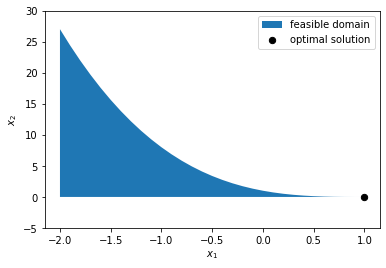

In [ ]:
x1 = np.linspace(-2, 2, 41)
xf = np.linspace(-2, 1, 31)
x2 = (1-xf) ** 3
plt.figure(2)

# plot constraint
plt.fill_between(xf, x2, label='feasible domain')

# plot point
plt.scatter(1, 0, marker='o', s=40, c='k', label='optimal solution')

plt.ylim(-5, 30)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper right')
plt.show()

KKT: 

\begin{equation}
\begin{aligned}
\min_{x_1, x_2} L = -x_1 + \mu_1(x_2 - (1 −x_1)^3) - \mu_2x_2
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{\partial L}{\partial x} = \begin{bmatrix} -1 + 3\mu_1(1-x_1)^2\\\mu_1 - \mu_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} 
\end{aligned}
\end{equation}

Assume $g_1$ is inactive constraint, thus we have $\mu_1 = 0$, however this violate the stationary point condition, thus $g_1$ must be active constraint, which means $x_2 - (1 −x_1)^3 = 0$ and $\mu_1 > 0$. If $\mu_1 > 0$, it means $\mu_2 > 0$, otherwise we could not satisfy $\mu_1 - \mu_2 = 0$, so $x_2 = 0$, $x_1 = 1$ must be true in order to satisfy KKT condition, which match our visual result. 

P3:
\begin{equation}
\begin{aligned}
\min_{x_1,x_2,x_3} L = -x_1x_2 - x_2x_3 - x_1x_3 + \lambda(x1 + x2 + x3 −3)
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\frac{\partial L}{\partial x} = \begin{bmatrix}-x_2 - x_3 + \lambda \\-x_1-x_3 + \lambda \\ -x_2 - x_1 + \lambda \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix} 
\end{aligned}
\end{equation}

we solve system of linear equation, which is $\begin{bmatrix}-x_2 - x_3 + \lambda \\-x_1-x_3 + \lambda \\ -x_2 - x_1 + \lambda \\x_1 + x_2 + x_3 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\3\end{bmatrix} $, and we can get $x_1 = x_2 = x_3 = 1, \lambda = 2$ the local solution for the maximization problem is 3


In [36]:
import numpy as np

# objective function
f = lambda x1,x2,x3: x1**2 + x2**2 + x3**2

def get_f(x1,x2,x3):
  return x1 ** 2 + x2 ** 2 + x3 ** 2

def get_df_dx(x1, x2, x3):
    df_ds = np.vstack((2 * x2, 2 * x3))
    df_dd = np.array([2 * x1], dtype=float)
    return df_ds, df_dd

# constraints 
def get_h(x1,x2,x3):
    return np.array([(x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1, x1 + x2 - x3])

def get_dh_dx(x1,x2,x3):
    dh_ds = np.vstack((np.hstack(((2/5) * x2, (2/25) * x3)), np.array([[1, -1]], dtype=float)))
    dh_ds_inv = np.linalg.inv(dh_ds)
    dh_dd = np.vstack(((1 / 2) * x1, 1.))
    return dh_ds_inv, dh_dd, dh_ds

def solveh(x1,x2,x3):
    error = 1e-3
    h = get_h(x1,x2,x3)
    norm = []
    count = 0
    while np.linalg.norm(h) >= error:
        dh_inv, _, dh = get_dh_dx(x1, x2, x3)
        ds = np.matmul(dh_inv, h)
        x2 = x2 - ds[0]
        x3 = x3 - ds[1]
        h = get_h(x1, x2, x3)
        norm.append(np.linalg.norm(h))
    
    return x1,x2,x3
  

def df_dx(x1, x2, x3):
    df_ds = np.array([[2 * x2], [2 * x3]])
    df_dd = np.array([2 * x1], dtype=float)
    return df_ds, df_dd




def df_dd(x1,x2,x3):
    df_ds, df_dd = df_dx(x1,x2,x3)
    dh_ds_inv, dh_dd, dh_ds = get_dh_dx(x1, x2, x3)
    
    #df_dd = f_g(x)[0] - np.matmul(np.matmul(f_g(x)[1:, :].T, dh_inv), dh_dx[:,0].reshape(2,1))
    
    df_dd1 = df_dd - np.matmul(df_ds.T, np.matmul(dh_ds_inv, dh_dd))
    
    return df_dd1, dh_ds_inv, dh_ds, dh_dd
    
def line_search(x1, x2, x3):
    a = 1. 
    dfdd, _, _, _ = df_dd(x1,x2,x3)
    phi = lambda a, x1, x2, x3, df: f(x1, x2, x3) - a * 0.3 * np.matmul(dfdd, dfdd.T)

    def f_a(x1, x2, x3, alpha,tilt=0.3):
      
        dfdd, dh_ds_inv, dh_ds, dh_dd = df_dd(x1,x2,x3)
        
        x1 = x1 - a * dfdd.flatten()
        ds = np.matmul(np.matmul(dh_ds_inv, dh_dd), dfdd.T).flatten()
        x2 = x2 + a * ds[0]
        x3 = x3 + a * ds[1]
        return f(x1, x2, x3)
                                     
                                      
    while phi(a, x1, x2, x3, dfdd) < f_a(x1, x2, x3, a):
        a *= 0.5
        dfdd, _, _, _ = df_dd(x1,x2,x3)
    return a   


eps = 1e-3  # termination criterion
x1 = np.array([1.0], dtype=float)
x2 = np.array([2.0], dtype=float)
x3 = np.array([3.0], dtype=float)
iter = 0  # counter
x1, x2, x3 = solveh(x1, x2, x3)
dfdd, _, _, _ = df_dd(x1,x2,x3)
df_dd_norm = np.linalg.norm(dfdd)

while df_dd_norm >= eps:
    a = line_search(x1, x2, x3)
    dfdd, _, _, _ = df_dd(x1,x2,x3)
    x1 = x1 - a * dfdd.flatten()
    dh_ds_inv, dh_dd, dh = get_dh_dx(x1, x2, x3)
    ds = a * np.matmul(np.matmul(dh_ds_inv, dh_dd), dfdd.T).flatten()
    x2 = x2 + ds[0]
    x3 = x3 + ds[1]
    x1, x2, x3 = solveh(x1, x2, x3)
    dfdd, _, _, _ = df_dd(x1,x2,x3)
    df_dd_norm = np.linalg.norm(dfdd)

print(x1,x2,x3)


[-1.57431032] [1.37765938] [-0.19665095]


P5: 

\begin{equation}
\begin{aligned}
L = \min \sum^{N-1}_i c_{ij}
\end{aligned}
\end{equation}

solution is x1 = -1.5743, x2 - 1.3776, x3 = -0.1966